In [1]:
import matplotlib.pyplot as plt
import numpy as np 
# needed for postprocessing
import imageio, io
from PIL import Image

---

# Buffers

so this is mostly about avoiding writing intermediate stuff to disk 
because **matplotlib** is sometimes very dumb.

but there's some interesting $hit about **gifs** 

In [ ]:
t = 0 
R = 2 + np.cos(5*theta + t)
plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.axis('off')

plt.fill(R*X, R*Y,'k');
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')

# writing individual images to disk

not optimal you save multiple images to disk
but **TIFF** is a single file so is easier to import. 

**Unless** you really should do the **TIFF** unless for some reason 
you want to edit the order of the files later.


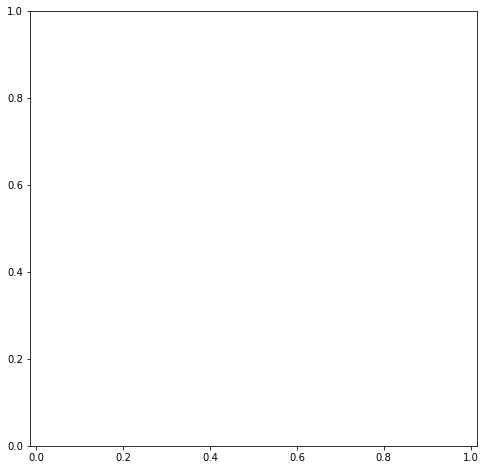

In [2]:
NUM_FRAMES = 100
NUM_PTS = 100

theta  = np.linspace(0, 2*np.pi, NUM_PTS)
X = np.cos(theta)
Y = np.sin(theta)

plt.figure(figsize=(8, 8))
plt.axis('equal')

for k,t in enumerate(np.linspace(0, np.pi, NUM_FRAMES)):
    # plot the flower in matplotlib
    R = 2 + np.cos(5*theta + t)
    plt.axis('off')
    plt.fill(R*X, R*Y,'k');  
    # hack starts here :  
    # keep things in memory no intermediate writing to disk
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    # I believe this keeps the number o images in memory down
    plt.cla()
    im = Image.open(buffer)
    #delete alpha channel and save
    imageio.imsave('flowers{:03d}.png'.format(k), np.array(im)[:,:,-1])
    

---

# Preferred solution

so everything goes into a single **TIFF**

- TIFF doesn't like alpha channels at all so I delete it 
- if u know ```numpy``` then this is trivial

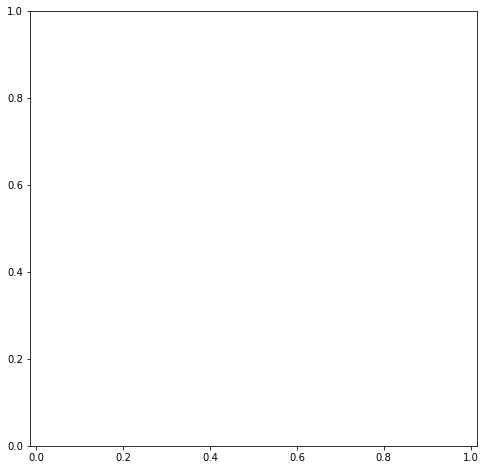

In [2]:
NUM_FRAMES = 100
NUM_PTS = 100

theta  = np.linspace(0, 2*np.pi, NUM_PTS)
X = np.cos(theta)
Y = np.sin(theta)

plt.figure(figsize=(8, 8))
plt.axis('equal')

ims = []

for t in np.linspace(0,np.pi,NUM_FRAMES):
    # plot the flower in matplotlib
    R = 2 + np.cos(5*theta + t)
    plt.axis('off')
    plt.fill(R*X, R*Y,'k');  
    
    # hack starts here :  
    # keep things in memory no intermediate writing to disk
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    # believe this keeps the number of images held in memory down
    plt.cla()
    #delete alpha channel and add to stack
    ims.append( np.array(Image.open(buffer))[:,:,-1])

imageio.mimwrite('flower.tiff', ims,format='TIFF')

---

# getting rid of the Mathematica image artefact

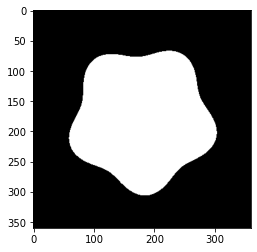

In [51]:
import imageio
im = imageio.imread('polarStar_1001.png')
xx = np.zeros_like(im)
B_W = 10 #width to be filled in black
for i in range(3):
    xx[B_W:-B_W,B_W:-B_W,i] = im[B_W:-B_W,B_W:-B_W,0]
imageio.imsave('polarStar2_1001.png', xx)    
plt.imshow(xx)


In [42]:
im = imageio.imread('FLOWER/flowers000.jpg')

In [43]:
im.shape

(576, 576, 3)

In [68]:
def mk_gif(frames, fn='weather.gif', duration=.3):
    with imageio.get_writer(fn, mode='I',duration=duration) as writer:
        for frame in frames:
            if frame is None: continue
            writer.append_data(frame)
    writer.close()

In [266]:
from scipy import signal

ss = imageio.imread('mysig.jpg')
G = ss.T
#clamp values
G[G < 200] = 0
G[G > 200] = 255
#invert
G = 255 - G
GG = np.stack((G,)*3).T

---

## display in HTML

This is more important later because **plt** won't display animated **gif** correctly

![](./mysig.jpg)

In [267]:
K = np.ones((3,3), dtype=np.uint8)
frames = [GG]

for _ in range(20):
    S = signal.convolve2d( G, K, boundary='wrap')[1:-1,1:-1]
    S[S > 0] = 255
    #have to transpose to get the right shape
    frames.append(np.stack((S,)*3).T)
    G = S


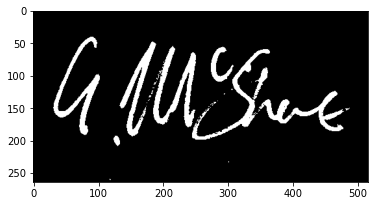

In [268]:
plt.imshow(frames[0]);

mk_gif(frames)

![](./weather.gif)

In [ ]:
xx = [frames[0]]*10
xx.extend(frames)

imageio.mimwrite('sig.tiff', xx, format='TIFF')